# 3. Do the Eda on this Dataset :Presidential Election Polls 2024 Dataset and extract useful information.

## Dataset Description:

This dataset co_prises the results of a nationwide presidential election poll conducted on March 4, 2024. The
data offers various insights but does not align with the official election results. You are encouraged to create
your notebooks and delve into the data for further exploration

link: https://drive.google.com/file/d/12ePp7dXKroaFVjIo0OgHZWWnBpzwPkFP/view

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## loading the dataset

In [2]:
df =pd.read_csv("/content/election2024.csv")


In [3]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [4]:
df.shape


(1600, 16)

In [5]:
df.columns


Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

## Checking duplicate values


In [7]:
df.duplicated().sum()


0

## Checking for null values

In [8]:
df.isnull().sum()


,0
id,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0


## dropping unnecessary column

In [9]:
df.drop('id',axis=1,inplace=True)


In [10]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [11]:
def UniqueValues(col):
    for i in col :
        print(f"{i} unique values are {df[i].unique()}")
        print("=================================================")

UniqueValues(df.columns)

sex unique values are ['male' 'female']
age unique values are [18. 23. 20. 22. 21. 27. 37. 43. 39. 36. 49. 60. 44. 61. 67. 29. 47. 32.
 45. 35. 53. 71. 54. 55. 48. 66. 56. 68. 69. 33. 76. 77. 70. 86. 90. 75.
 80. 24. 19. 25. 28. 31. 26. 30. 38. 40. 41. 52. 50. 51. 46. 63. 34. 42.
 65. 73. 74. 72. 59. 57. 58. 78. 79. 62. 64. 82. 84. 85. 87. 83. 81.]
federal_district unique values are ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
type_of_city unique values are ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
knows_election_date unique values are ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']
will_vote unique values are ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer']
candidate unique values 

## Dealing with Nan Values in job type column

In [12]:
df.job_type.value_counts


<bound method IndexOpsMixin.value_counts of 0                           NaN
1       commercial organization
2        law enforcement agency
3                           NaN
4       commercial organization
                 ...           
1595                        NaN
1596                        NaN
1597                        NaN
1598    commercial organization
1599                        NaN
Name: job_type, Length: 1600, dtype: object>

In [13]:
df["job_type"] =df["job_type"].fillna('commercial organization')


In [14]:
df.company_type.unique()


array(['farming', 'trade', 'law enforcement agency', nan,
       'tech, programming, communications', 'refused to answer',
       'industry, manufacturing', 'other',
       'housing and communal services', 'finances', 'education',
       'healthcare', 'state administration', 'culture, sports',
       'transportation, storage',
       'Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...',
       'catering, restaurants', 'construction, architecture',
       'hard to say', 'entertainment, tourism', 'social services',
       'media'], dtype=object)

In [15]:
df["company_type"] =df["company_type"].fillna("farming")


In [16]:
df.isnull().sum()

,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0
education,0


## EDA

<Figure size 1200x600 with 0 Axes>

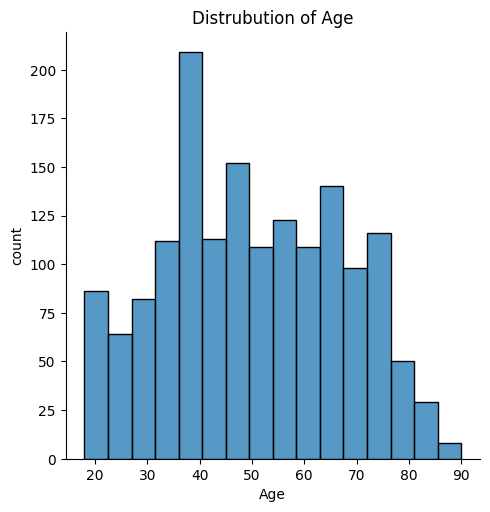

In [17]:
plt.figure(figsize=(12,6))
sns.displot(x="age",data=df)
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Distrubution of Age")
plt.show()

`observation and insights`
- 35-45 has more age of peoples for election.
- the distrubution is nearly normal distrubution.

## how many fedaral district are affected on election which is most effective ?

In [18]:
print("federal district count is :",len(df["federal_district"].unique()))


federal district count is : 8


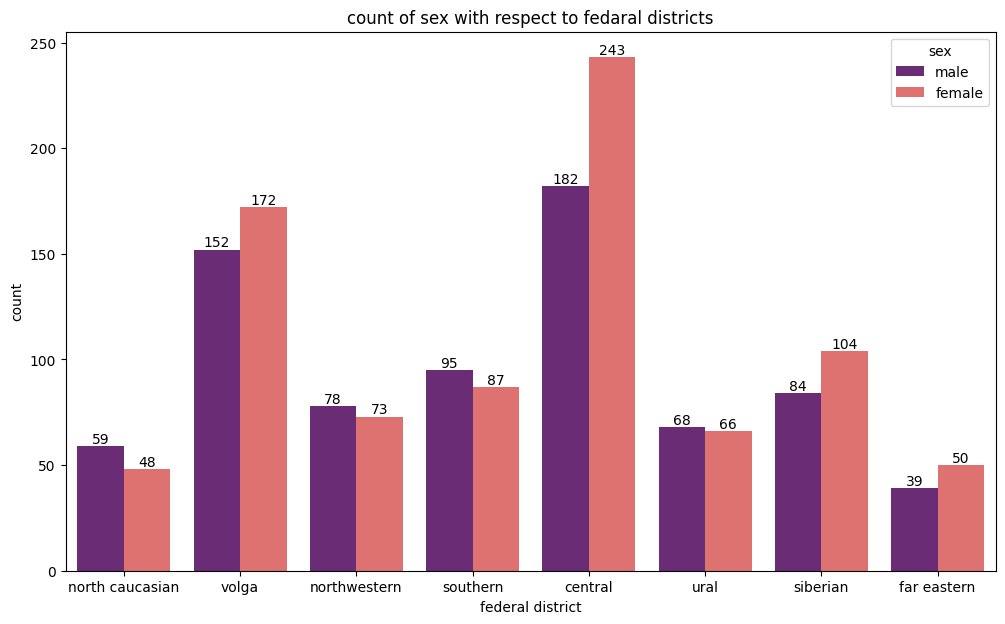

In [19]:
plt.figure(figsize=(12,7))
ax =sns.countplot(data=df,x="federal_district",palette="magma",hue="sex")
plt.xlabel("federal district")
plt.ylabel("count")
plt.title("count of sex with respect to fedaral districts")
for i in ax.containers :
    ax.bar_label(i)

plt.show()

`Observation and Insight:`
- There are 8 federal district for election.
- the highest count of male and female in center federal district.

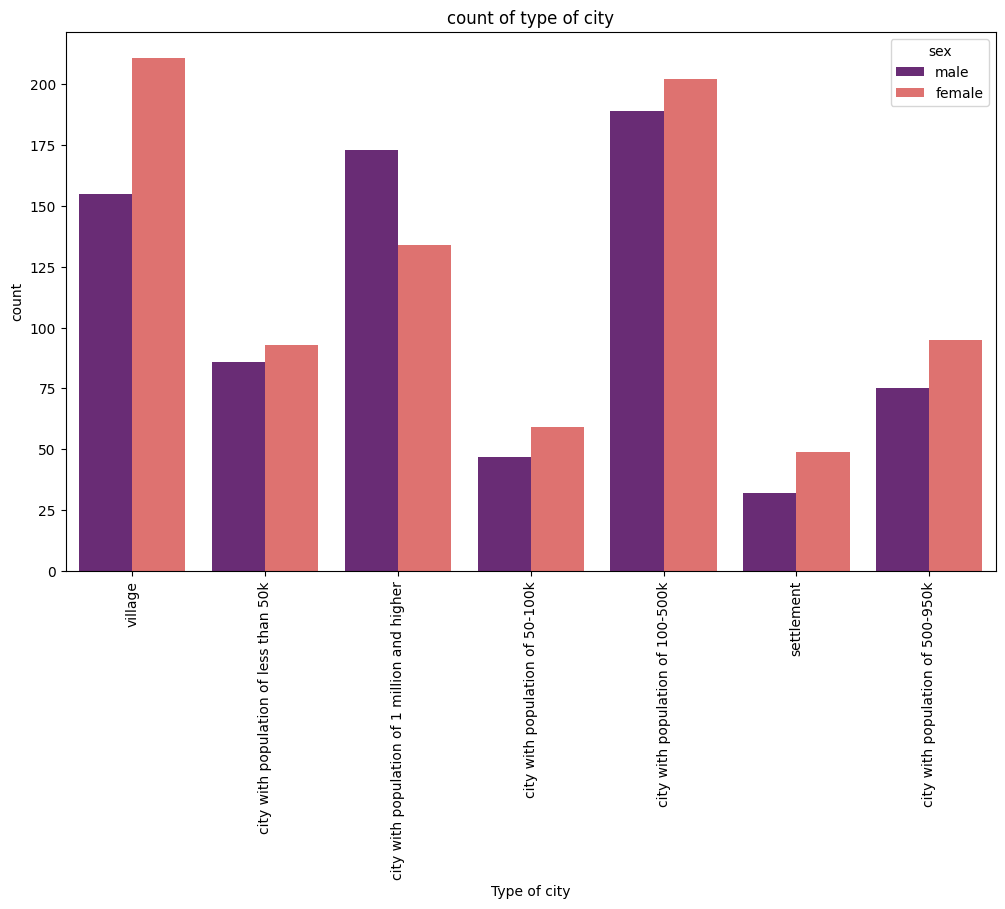

In [20]:
## which types of city has more votes?
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="type_of_city",palette="magma",hue="sex")
plt.xlabel("Type of city")
plt.ylabel("count")
plt.title("count of type of city")
plt.xticks(rotation=90)
plt.show()

`Observation and Insight`
- There are 7 city is going do election.
- the highest voter in village,city population less than 50k,city population with 50,100k as per last data.

## How many people know about election date.

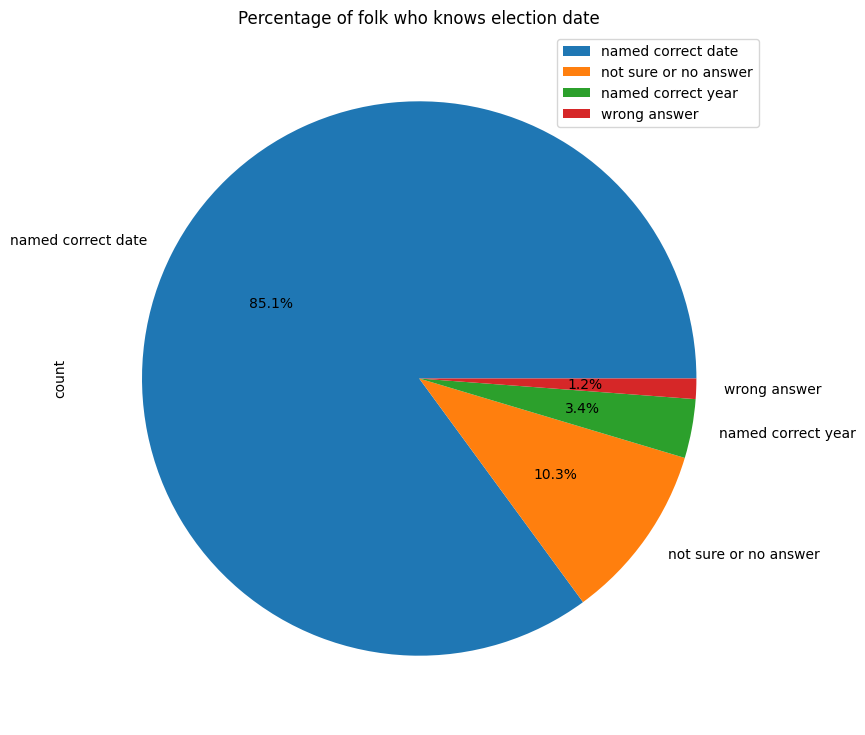

In [21]:
plt.figure(figsize=(12,9))
df.knows_election_date.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Percentage of folk who knows election date")
plt.legend()
plt.show()

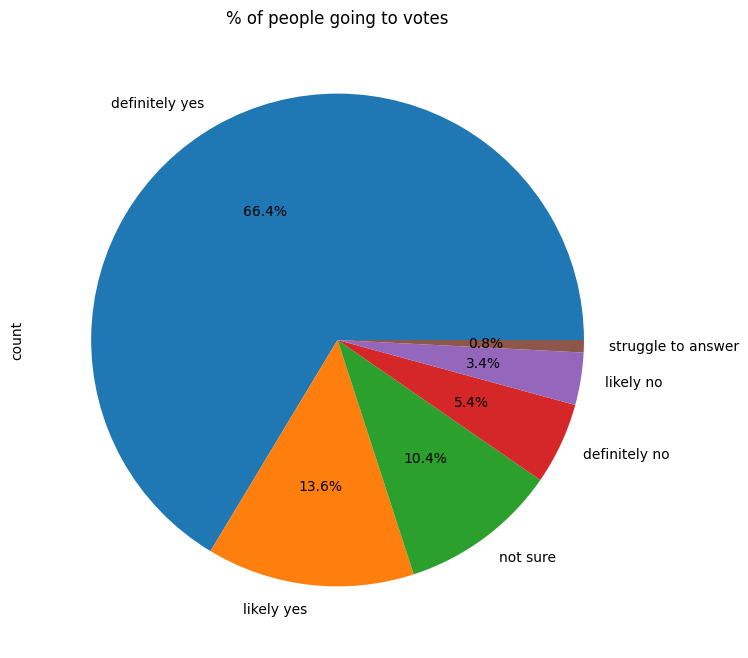

In [22]:
plt.figure(figsize=(12,8))
df.will_vote.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("% of people going to votes")

plt.show()

## How many candidate are standing in Russia election ?

In [23]:
df.candidate.unique()

array(['Putin', 'Davankov', 'will not take part', 'spoilt vote',
       'Kharitonov', 'struggle to answer', 'Slutskiy'], dtype=object)

As per data candidate are
- Putin
- Davankov
- Kharitonov
- Slutskiy

## Which candidate will performing good as per exit poll ?


<Axes: xlabel='candidate'>

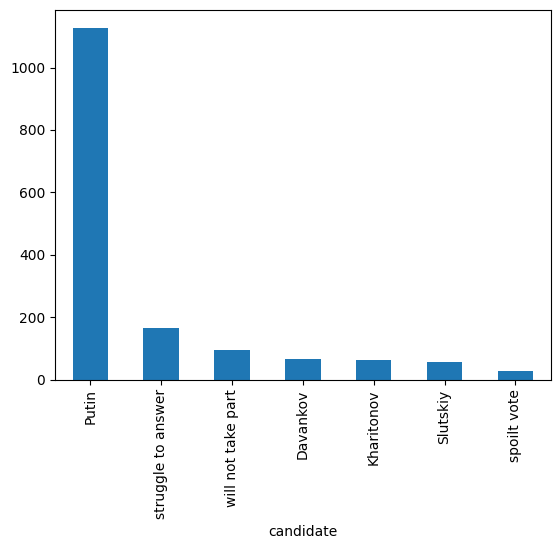

In [24]:
df.candidate.value_counts().plot.bar()

## What is televison usage during election Exit poll ?

In [25]:
df.television_usage.value_counts(normalize=True) * 100


,proportion
television_usage,
less than 4 hours a day,30.625
over 4 hours a day,27.250
does not watch,20.750
several times a week,12.750
several times a month,4.750
once half a year,3.875


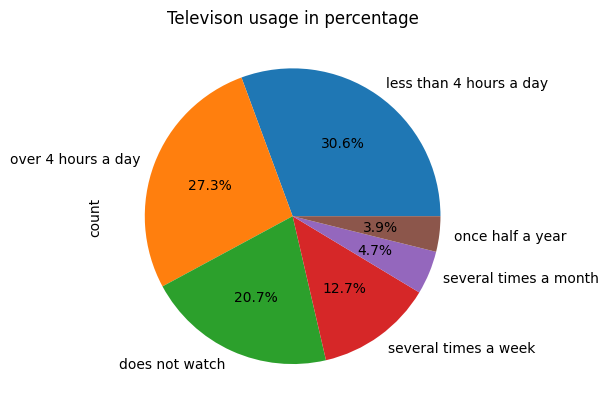

In [26]:

df.television_usage.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Televison usage in percentage")
plt.show()

## What is Internet usage during election exit poll ?

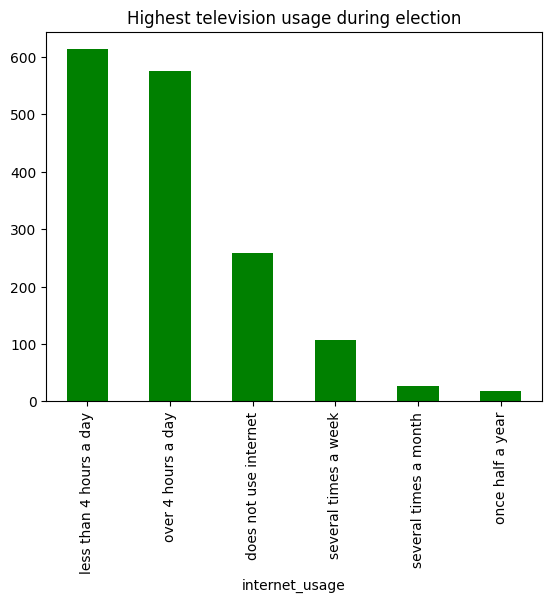

In [27]:

df.internet_usage.value_counts().plot.bar(color="g")
plt.title("Highest television usage during election")
plt.show()


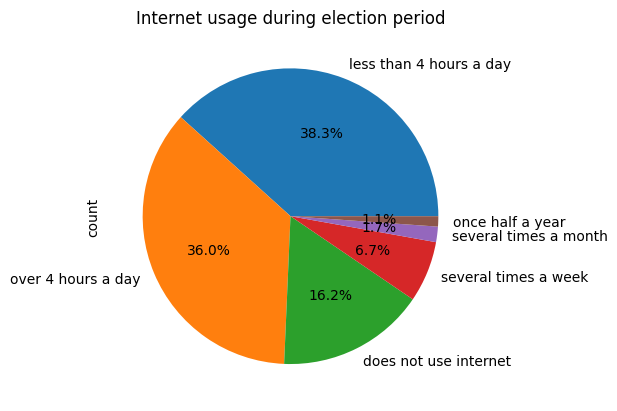

In [28]:
df.internet_usage.value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Internet usage during election period")
plt.show()

## What was the education of voters? which type of voter can vote more?

In [29]:
df_educated_voters =df.education.value_counts()

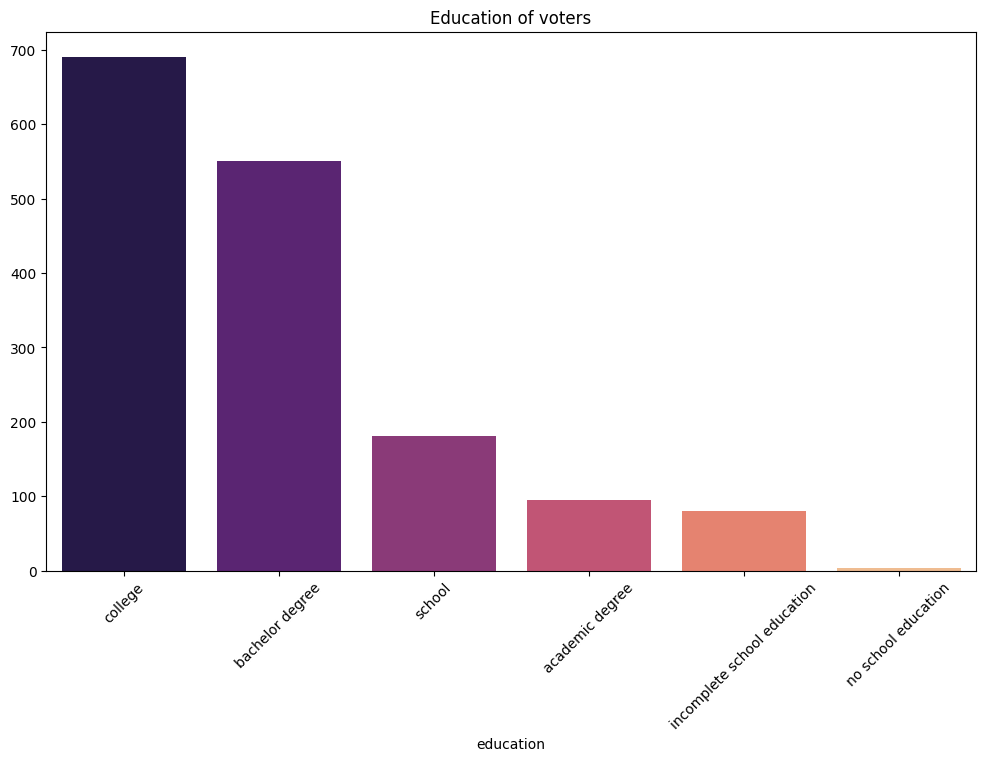

In [30]:
plt.figure(figsize=(12,7))
sns.barplot(x=df_educated_voters.index,y=df_educated_voters.values,palette="magma")
plt.xticks(rotation =45)
plt.title("Education of voters")
plt.show()

## Income of voters

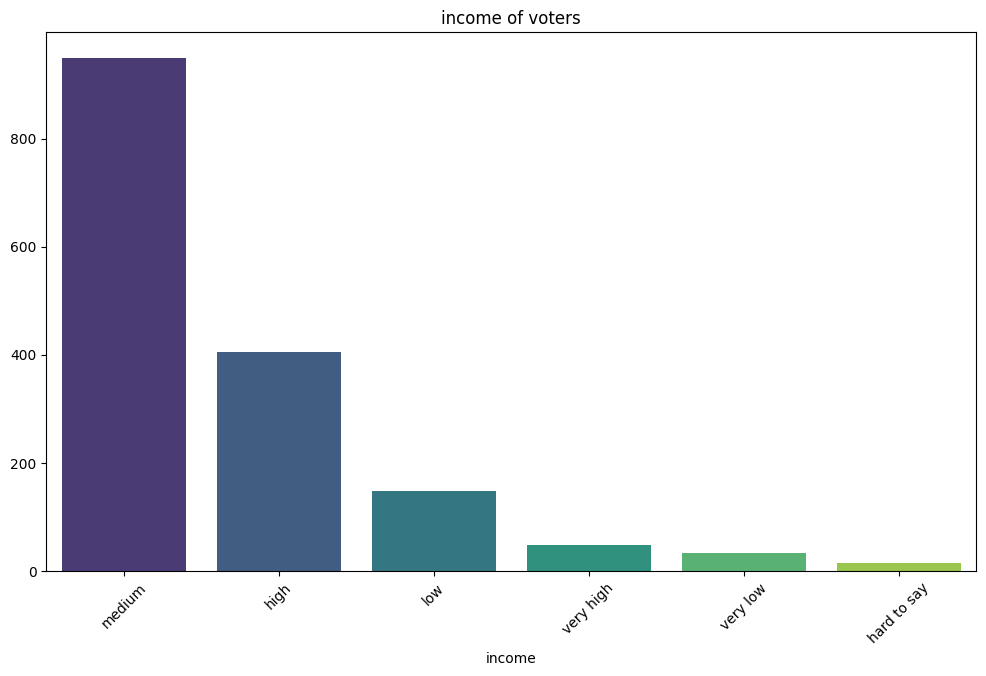

In [31]:
df_highest_income =df.income.value_counts()
plt.figure(figsize=(12,7))
sns.barplot(x=df_highest_income.index,y=df_highest_income.values,palette="viridis")
plt.xticks(rotation =45)
plt.title("income of voters")
plt.show()

## Type of employment in voters

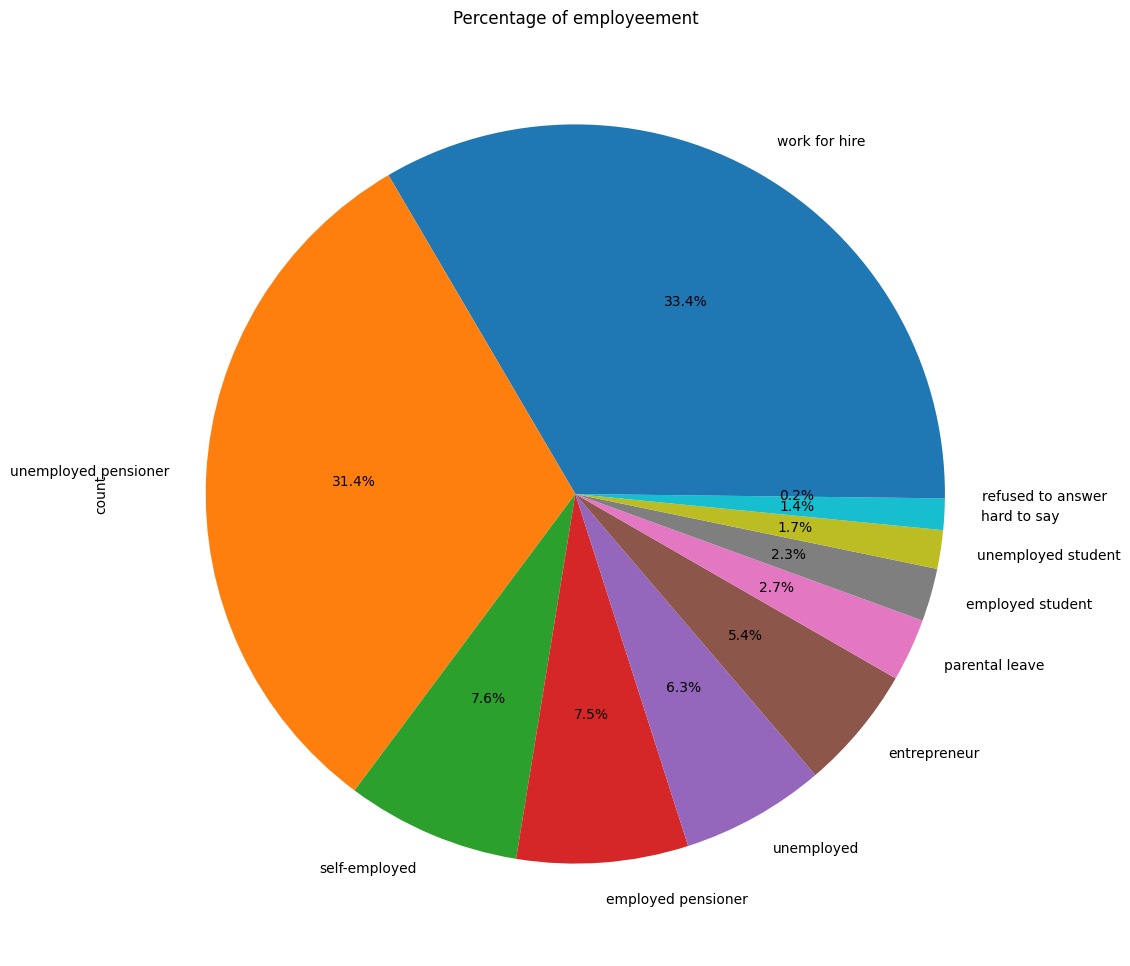

In [32]:

plt.figure(figsize=(12,12))
df.employment.value_counts().plot.pie(autopct ="%1.1f%%")
plt.title("Percentage of employeement")
plt.show()

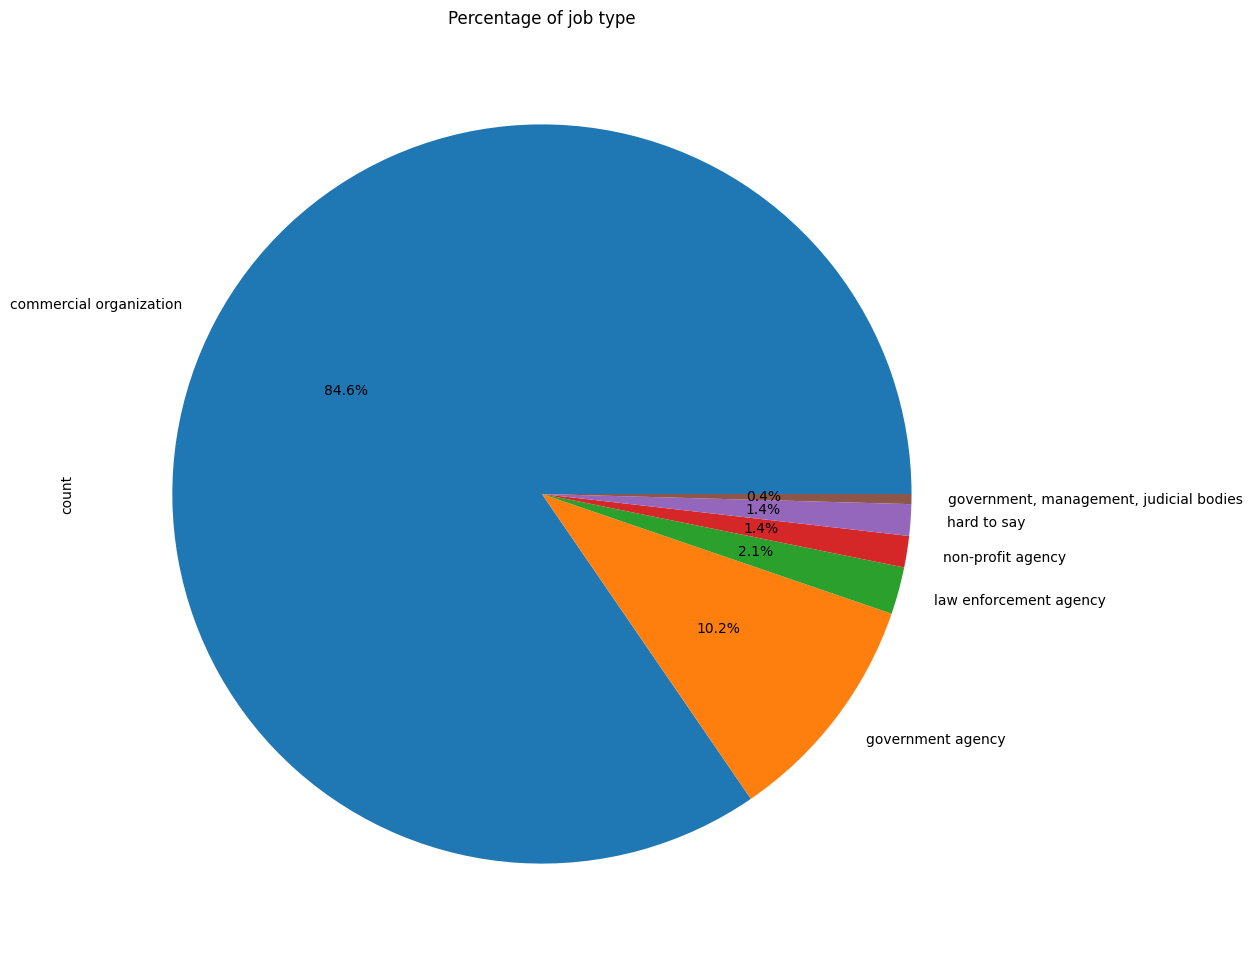

In [33]:
plt.figure(figsize=(12,12))
df.job_type.value_counts().plot.pie(autopct ="%1.1f%%")
plt.title("Percentage of job type")
plt.show()

<Axes: xlabel='company_type'>

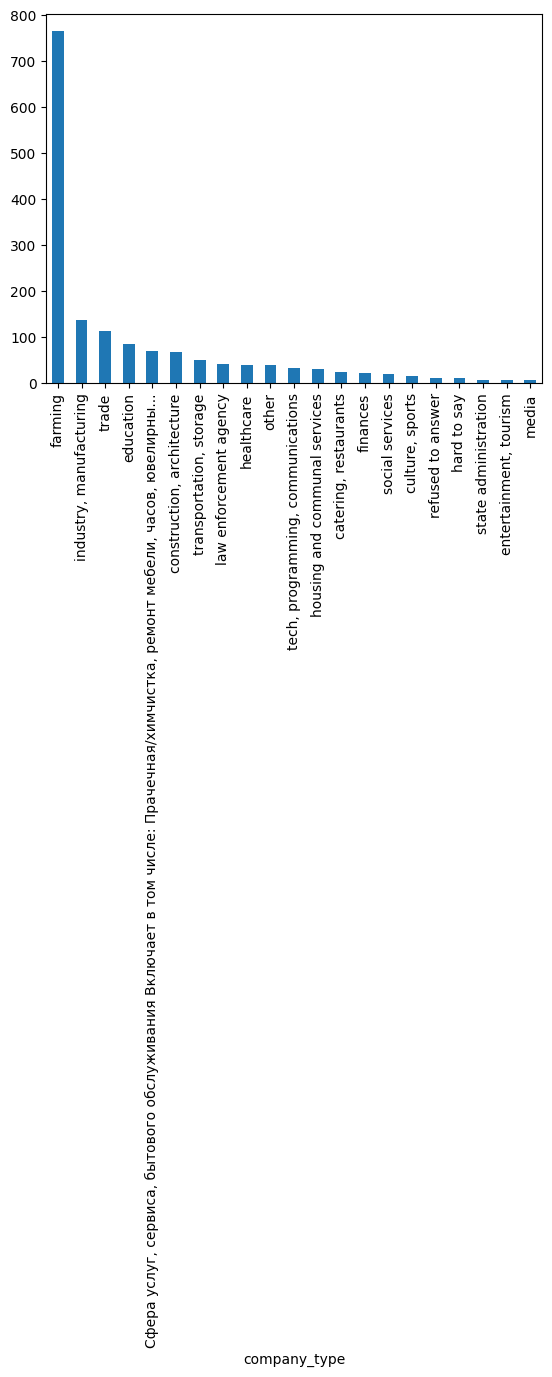

In [34]:

df.company_type.value_counts().plot.bar()